In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *

df = pd.read_csv('log24.txt', sep='\t', header=0, skiprows = [1])
print(list(df.columns.values))

['Tempo', 'HP', 'VCAS', 'XGPS', 'YGPS', 'ZGPS', 'MagHead', 'NZ', 'Gyx', 'Gyy', 'Gyz', 'NX', 'NY', 'MagX', 'MagY', 'MagZ', 'Pressao', 'Temperatura', 'Latitude', 'Longitude', 'HeadGPS', 'VelocidadeGPS', 'VelocidadeSubidaGPS', 'TemGPS', 'LatitudeHome', 'LongitudeHome', 'SatelitesUsados', 'temTempo', 'DAlvo', 'DAlvo_DRPitot', 'DAlvo_DRGPS', 'PosPayloadDrop_Pitot', 'PosPayloadDrop_GPS', 'LancamentoAutomaticoPlanador', 'LancamentoAutomaticoCarga', 'altitudeLiberaPlanadores', 'altitudeLiberaCarga', 'Unnamed: 37']


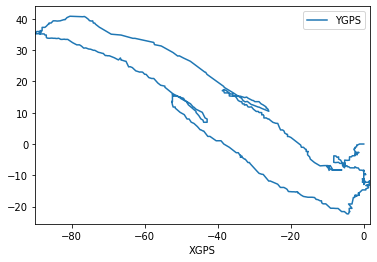

In [2]:
ax = plt.gca()
df.plot(kind='line',x='XGPS',y='YGPS',ax=ax)

(86180, 86195)

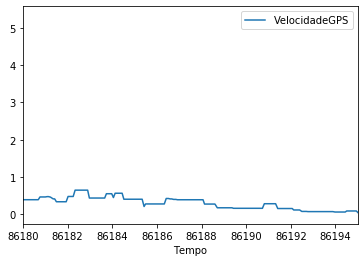

In [36]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='VelocidadeGPS',ax=ax)
ax.set_xlim(86180, 86195)

(0, 100)

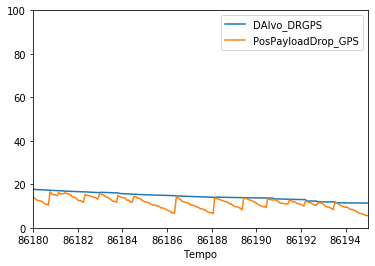

In [35]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='DAlvo_DRGPS',ax=ax)
df.plot(kind='line',x='Tempo',y='PosPayloadDrop_GPS',ax=ax)
ax.set_xlim(86180, 86195)
ax.set_ylim(0, 100)

(10, 20)

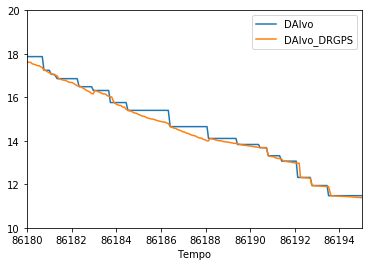

In [34]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='DAlvo',ax=ax)
df.plot(kind='line',x='Tempo',y='DAlvo_DRGPS',ax=ax)
ax.set_xlim(86180, 86195)
ax.set_ylim(10, 20)

In [5]:
ultimoTempo = 62397.017
ultimoGpsX = 0

pospredictX = 0
pospredictY = 0

XpredVetor = []
YpredVetor = []

def deadreckon(gpsx, gpsy, maghead, vcas, tempoAtual):
    # GPS atualizou
    global ultimoGpsX
    global pospredictX
    global pospredictY
    global ultimoTempo
    
    if(ultimoGpsX != gpsx):
        pospredictX = gpsx
        pospredictY = gpsy
        ultimoGpsX = gpsx
        #print('GPS mudou')
    # Se o GPS ainda não atualizou
    else:
        pospredictX = pospredictX - cos(maghead*pi/180)*vcas*(tempoAtual-ultimoTempo)
        pospredictY = pospredictY + sin(maghead*pi/180)*vcas*(tempoAtual-ultimoTempo)
    ultimoTempo = tempoAtual
    
    return pospredictX, pospredictY

# Itera em cada linha
for i, row in df.iterrows():
    x, y = deadreckon(row['XGPS'], row['YGPS'], row['MagHead'], row['VCAS'], row['Tempo'])
    XpredVetor.append(x)
    YpredVetor.append(y)
    
df.insert (df.shape[1]-1, 'Xpred', XpredVetor)
df.insert (df.shape[1]-1, 'Ypred', YpredVetor)



(62620, 62650)

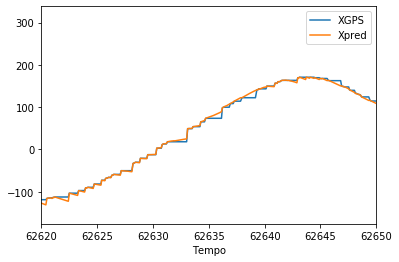

In [6]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='XGPS',ax=ax)
df.plot(kind='line',x='Tempo',y='Xpred',ax=ax)
ax.set_xlim(62620, 62650)

(62620, 62650)

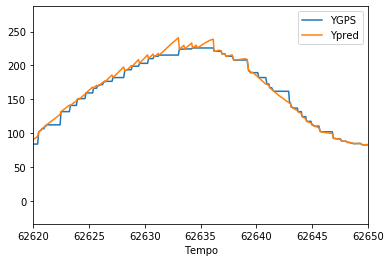

In [7]:
ax = plt.gca()

df.plot(kind='line',x='Tempo',y='YGPS',ax=ax)
df.plot(kind='line',x='Tempo',y='Ypred',ax=ax)
ax.set_xlim(62620, 62650)

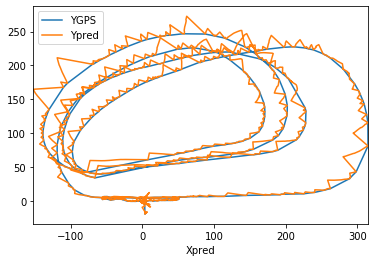

In [8]:
ax = plt.gca()
df.plot(kind='line',x='XGPS',y='YGPS',ax=ax)
df.plot(kind='line',x='Xpred',y='Ypred',ax=ax)

(62620, 62650)

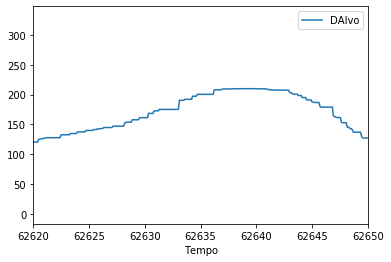

In [9]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='DAlvo',ax=ax)
ax.set_xlim(62620, 62650)

In [10]:
# ultimoTempo = 62397.017
# ultimoDistAlvoGPS = 0
# sinalPredict = 1
# distAlvoPredict = 0

# distAlvoPred = []

# def deadreckon1d(distAlvoGPS, vcas, tempoAtual):
#     # GPS atualizou
#     global ultimoDistAlvoGPS
#     global ultimoTempo
#     global distAlvoPredict
#     global sinalPredict
    
    
#     if(ultimoDistAlvoGPS != distAlvoGPS):
#         distAlvoPredict = distAlvoGPS
#         if(ultimoDistAlvoGPS > distAlvoGPS):
#             sinalPredict = -1
#         else:
#             sinalPredict = 1
#         ultimoDistAlvoGPS = distAlvoGPS

#     # Se o GPS ainda não atualizou
#     else:
#         distAlvoPredict = distAlvoPredict + sinalPredict*vcas*(tempoAtual-ultimoTempo)
#     ultimoTempo = tempoAtual
#     return distAlvoPredict

# # Itera em cada linha
# for i, row in df.iterrows():
#     d = deadreckon1d(row['DAlvo'], row['VCAS'], row['Tempo'])
#     distAlvoPred.append(d)
    
# df.insert (df.shape[1]-1, 'DistAlvoPred', distAlvoPred)

In [11]:
# ax = plt.gca()
# df.plot(kind='line',x='Tempo',y='DAlvo',ax=ax)
# df.plot(kind='line',x='Tempo',y='DistAlvoPred',ax=ax)
# ax.set_xlim(62690, 62710)

In [12]:
from ITA_DeadReckoning import ITA_DeadReckoning

posPitot = ITA_DeadReckoning()
distAlvoPred = []

# Itera em cada linha
for i, row in df.iterrows():
    d = posPitot.estimaPosi(row['DAlvo'], row['VCAS'], row['Tempo'])
    distAlvoPred.append(d)
    
df.insert (df.shape[1]-1, 'DistAlvoPred', distAlvoPred)

(-100, 500)

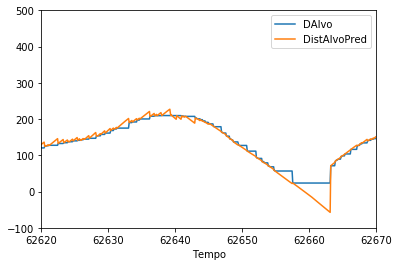

In [18]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='DAlvo',ax=ax)
df.plot(kind='line',x='Tempo',y='DistAlvoPred',ax=ax)
ax.set_xlim(62620, 62670)
ax.set_ylim(-100, 500)